<a href="https://colab.research.google.com/github/toche7/StatPy/blob/main/SEM_by_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Read:

https://cr-c.medium.com/variance-covariance-matrices-for-structural-equation-modeling-sem-in-python-d92f5a1f9a35

Data:

https://www.guilford.com/companion-site/Principles-and-Practice-of-Structural-Equation-Modeling-Fourth-Edition/9781462523344/files


In [ ]:
!pip install semopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import semopy as sem
import pandas as pd
import numpy as np
from statsmodels.stats.moment_helpers import corr2cov
# Data Import
data = pd.read_csv('houghton.csv')

In [ ]:
# Transforming correlations to Variance Covariance Matrix
variables = ["work1","work2","work3","happy","mood1","mood2","perform1","perform2","approval","beliefs","selftalk","imagery"]
data2= data[variables]
covMatrix = corr2cov(data2[1:13], data2[13:14])
X = np.tril(np.array(covMatrix))
X_low = np.tril(X)
X_low = X_low.T
for ind, i in enumerate(X_low):
    for ind2, j in enumerate(i):
        if(ind == ind2):
            X_low[ind][ind2]=0
covFull = X+X_low

In [ ]:
# Creating Dataframe for SEM analysis in python
dataframe = pd.DataFrame(data=covFull, index=variables, columns=variables)

In [ ]:
# Describing model for SEM
mod = """
# measurement model
Construc =~ beliefs + selftalk + imagery
Dysfunc =~ perform1 + perform2 + approval
WellBe =~ happy + mood1 + mood2
JobSat =~ work1 + work2 + work3
# error covariance
happy ~~ mood2 
# structural part
Dysfunc ~ Construc
WellBe ~ Construc + Dysfunc
JobSat ~ Construc + Dysfunc + WellBe"""

In [ ]:
model = sem.Model(mod)
res = model.fit(data=None, obj="MLW",solver='SLSQP',cov=dataframe, n_samples=263)

In [ ]:
estimates = model.inspect(std_est=True,)
stats =  sem.calc_stats(model)
basic_stats = stats[['DoF','chi2', 'RMSEA', 'NFI', 'TLI', 'CFI', 'GFI']]

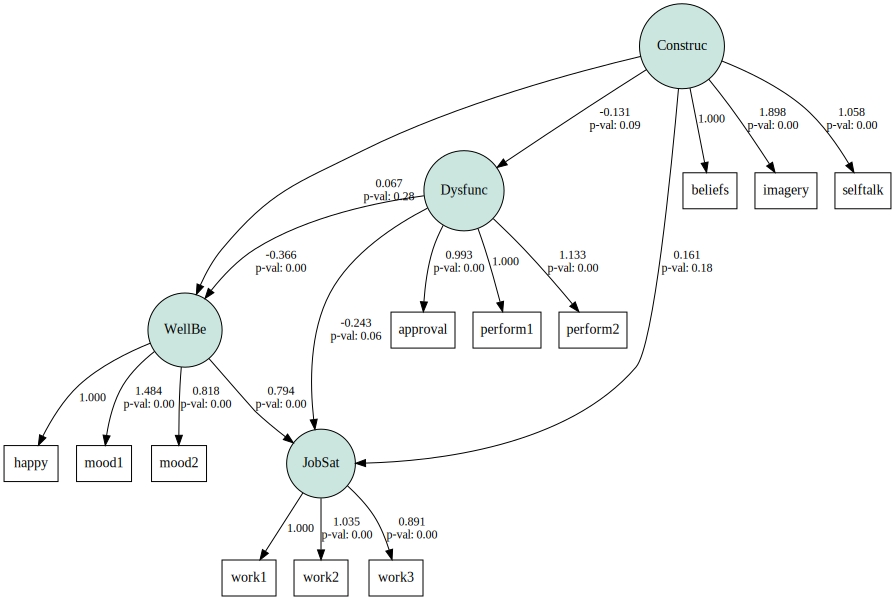

In [ ]:
sem.semplot(model, "model_houghton.png")